In [4]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#url_home = '/home/helios/Python/BIG_FILES/'
url_home = 'D:\\VS\\Pt\\'
app_train = pd.read_csv(url_home+'application_train.csv')
app_test = pd.read_csv(url_home+'application_test.csv')

In [6]:
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

In [7]:
print(app_test.shape)
app_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The test set is considerably smaller and lacks a `TARGET` column. 

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

## Examine the Distribution of the Target Column

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

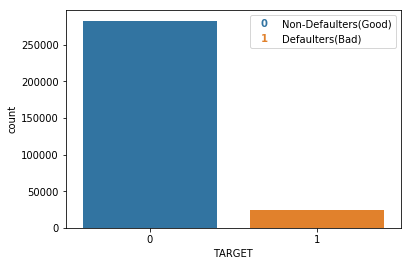

In [9]:
#check out custom labels for countplot

from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


labels=['Non-Defaulters(Good)', 'Defaulters(Bad)']
handltext = ['0','1']

ax = sns.countplot(x='TARGET',data=app_train)
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}); 

### Examine missing values

In [10]:
app_train.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
NONLIVINGARE

In [11]:
def missing_values_table(df):
    missing_vals = df.isnull().sum()
    missing_vals_proportions = ((df.isnull().sum()/len(df))*100).round(1)
    missing_vals_df = pd.concat([missing_vals,missing_vals_proportions], axis=1)
    missing_vals_df = missing_vals_df.rename(columns={0:'Missing Vals',1:'Missing Vals Proportions'})
    missing_vals_df = missing_vals_df.sort_values(by=['Missing Vals'],ascending=False)
    missing_vals_df = missing_vals_df[missing_vals_df['Missing Vals']>0]
    return missing_vals_df

In [12]:
missing_values_table(app_train)

,Missing Vals,Missing Vals Proportions
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


### Column Types

In [13]:
app_train.select_dtypes(include='object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding categoricals

In [14]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print('Training features shape: {}'.format(app_train.shape))
print('Testing features shape: {}'.format(app_test.shape))

Training features shape: (307511, 246)
Testing features shape: (48744, 242)


### Aligning Training and Testing Data

In [15]:
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join='inner', axis=1)
app_train['TARGET'] = train_labels
print('Training features shape: {}'.format(app_train.shape))
print('Testing features shape: {}'.format(app_test.shape))

Training features shape: (307511, 243)
Testing features shape: (48744, 242)


### Anomalies

In [16]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [17]:
(app_train['DAYS_BIRTH']/(-365)).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [18]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [19]:
(app_train['DAYS_EMPLOYED']/(-365)).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
app_train[app_train['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].describe()

count     55374.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
anom = app_train[app_train['DAYS_EMPLOYED']>0]
non_anom = app_train[app_train['DAYS_EMPLOYED']<=0]
print('% defaults in anom {}'.format(anom.TARGET.mean()*100))
print('% defaults in non_anom {}'.format(non_anom.TARGET.mean()*100))

% defaults in anom 5.399646043269405
% defaults in non_anom 8.65997453765215


In [22]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] > 0
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

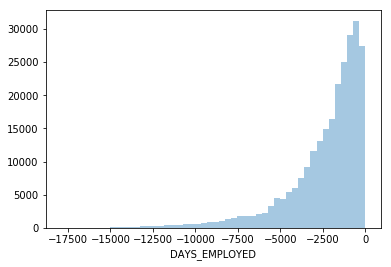

In [23]:
sns.distplot(app_train['DAYS_EMPLOYED'].dropna(), kde=False)

In [24]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] > 0
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

In [25]:
print('there are {} anomalies in test data'.format(app_test['DAYS_EMPLOYED_ANOM'].sum()))

there are 9274 anomalies in test data


In [26]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [31]:
from scipy.stats import pearsonr

#pearsonr(app_train['TARGET'],app_train['OCCUPATION_TYPE_Laborers'])
corr_matrix = app_train.apply(lambda x: pearsonr(x,app_train['TARGET']),axis=0)

In [32]:
corr_matrix['OCCUPATION_TYPE_Laborers']

(0.04301895495522363, 6.819497886027217e-126)

In [33]:
# effect of age on repayment
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
from scipy.stats import pearsonr
pearsonr(app_train['DAYS_BIRTH'],app_train['TARGET'])

(-0.07823930830982699, 0.0)

In [ ]:
sns.distplot(app_train['DAYS_BIRTH'],kde=False)

Lets take a look at the most negative correlated variables EXT_SOURCE

In [ ]:
neg_corr_vars = ['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']
neg_corr_vars_df = app_train[neg_corr_vars]
neg_corr_vars_corr_matrix = neg_corr_vars_df.corr()
neg_corr_vars_corr_matrix

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(neg_corr_vars_corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(neg_corr_vars_corr_matrix, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6, mask=mask)

In [ ]:
print(app_train['EXT_SOURCE_1'].describe().round(1))
print('****************')
print(app_train['EXT_SOURCE_2'].describe().round(1))
print('****************')
print(app_train['EXT_SOURCE_3'].describe().round(1))

Lets visualize the effect of EXT_SOURCE on TARGET

In [ ]:
ax_main = plt.figure(figsize=(10,12))

for index, col in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3,1,index+1)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,col],label='target=0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,col],label='target=1')
    plt.xlabel('{}'.format(col))
    plt.ylabel('Density')
    plt.title('Distribution of {} by TARGET value'.format(col))
    
plt.tight_layout(h_pad=0.8)

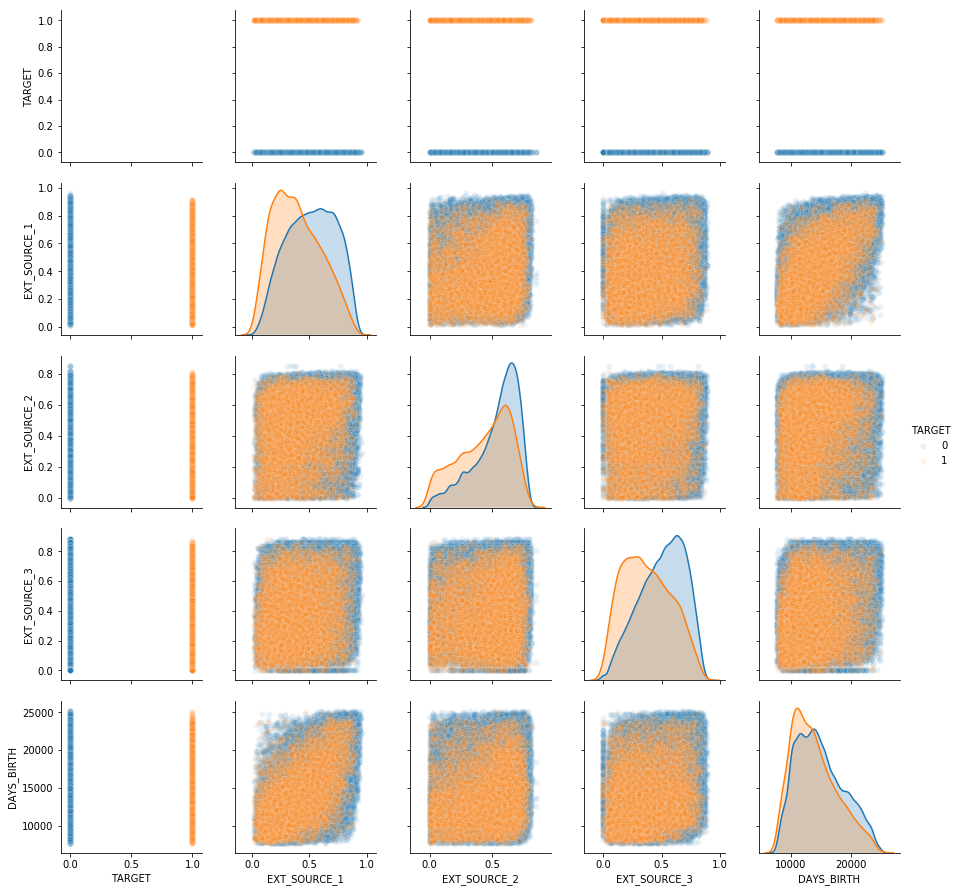

In [58]:
sns.pairplot(app_train[neg_corr_vars].dropna(), hue='TARGET',plot_kws={'alpha':0.1});